<a href="https://colab.research.google.com/github/elahekarimi/picture_text_extraction/blob/main/text_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! which tesseract

In [ ]:
import requests

In [ ]:
import requests
r = requests.get('https://raw.githubusercontent.com/tesseract-ocr/tessdata/4.00/ind.traineddata', stream=True)
# Corrected the directory name from 'tessenact-ocr' to 'tesseract-ocr'
with open('/usr/share/tesseract-ocr/4.00/tessdata/ind.traineddata', 'wb') as file:
    for block in r.iter_content(1024):
      if block:
        file.write(block)

In [ ]:
! apt install --reinstall tesseract-ocr libtesseract-dev libmackwand-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package libmackwand-dev


In [ ]:
! apt search tesseract

Sorting... Done
Full Text Search... Done
gimagereader/jammy 3.4.0-2 amd64
  Graphical GTK+ front-end to tesseract-ocr

gimagereader-qt5/jammy 3.4.0-2 amd64
  Graphical Qt 5 front-end to tesseract-ocr

libtesseract-dev/jammy 4.1.1-2.1build1 amd64
  Development files for the tesseract command line OCR tool

libtesseract4/jammy,now 4.1.1-2.1build1 amd64 [installed,automatic]
  Tesseract OCR library

python3-tesserocr/jammy 2.5.2-1build1 amd64
  Python wrapper for the tesseract-ocr API (Python3 version)

r-cran-cpp11tesseract/jammy 5.3.2-1.ca2204.1 amd64
  CRAN Package 'cpp11tesseract' (Open Source OCR Engine)

r-cran-orderanalyzer/jammy 1.0.0-1.ca2204.1 all
  CRAN Package 'orderanalyzer' (Extracting Order Position Tables from PDF-Based Order Documents)

r-cran-tesseract/jammy 5.2.2-1.ca2204.1 amd64
  CRAN Package 'tesseract' (Open Source OCR Engine)

tesseract-ocr/jammy 4.1.1-2.1build1 amd64
  Tesseract command line OCR tool

tesseract-ocr-afr/jammy 1:4.00~git30-7274cfa-1.1 all
  tesserac

In [ ]:
! sudo apt install --reinstall tesseract-ocr libtesseract-dev libmackwand-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package libmackwand-dev


In [ ]:
!pip install pytesseract
import pytesseract

# Replace with the actual path output by 'which tesseract'
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

In [ ]:
! apt install tesseract-ocr libtesseract-dev libmackwand-dev

from IPython.display import HTML, clear_output
clear_output()

In [ ]:
! pip install pytesseract
! pip install pytesseract wand opencv_python
clear_output()

In [ ]:
from PIL import Image
import pytesseract
import cv2
import numpy as np
from pytesseract import Output
import re

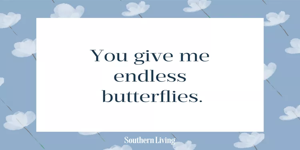

In [93]:
# Get the actual image URL (replace with your image URL)
image_url = "https://www.southernliving.com/thmb/3P_T5I44eHK0KJmLLaerQWCjudc=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/SL-RomanticMessages--4_butterflies-3ae0a1e2abcc45de8301651c7c23af8b.jpg"  # Example: Replace with the direct image URL

response = requests.get(image_url, stream=True)
response.raise_for_status()  # Raise an exception for bad responses (e.g., 404)

image = Image.open(response.raw)
image = image.resize((300, 150))
image.save('sample.png')
image

In [94]:
import pytesseract
import shutil
import os

# 1. Reinstall Tesseract (without libmackwand-dev):
! sudo apt install --reinstall tesseract-ocr libtesseract-dev

# 2. Update Alternatives (to link tesseract command):
! sudo update-alternatives --install /usr/bin/tesseract tesseract /usr/bin/tesseract 4

# 3. Update PATH (if necessary):
tesseract_path = shutil.which("tesseract")
if not tesseract_path:
    tesseract_path = "/usr/bin/tesseract"  # Should be correct after update-alternatives
    os.environ['PATH'] += os.pathsep + os.path.dirname(tesseract_path)

# 4. Set tesseract_cmd in pytesseract:
pytesseract.pytesseract.tesseract_cmd = tesseract_path

# 5. Verify the Installation:
! tesseract --version

# 6. Try Running Your OCR Code Again:
# ... (Your OCR code using pytesseract) ...

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
0 upgraded, 0 newly installed, 2 reinstalled, 0 to remove and 49 not upgraded.
Need to get 1,836 kB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libtesseract-dev amd64 4.1.1-2.1build1 [1,600 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 1,836 kB in 1s (1,469 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
(Reading database ... 123

In [95]:
custom_config = r'-l eng --oem 3 --psm 6'
text = pytesseract.image_to_string(image, config=custom_config)
print(text)

pd oy
' You give me
endless
butterflies.
»| ,



In [96]:
try:
  text = pytesseract.image_to_string(image, lang='eng')
  charectures_to_remove = "!.,;:'!?()-[]{}<>+−*/=^%$#@&|~“”©"
  new_string = text
  for char in charectures_to_remove:
    new_string = new_string.replace(char, '')
  print(new_string)
except IOError as e:
  print("Error (%s)." % e)

You give me

endless
butterflies

 



In [97]:
image = cv2.imread('sample.png')

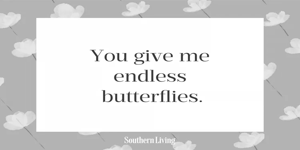

In [98]:
def gray_scale(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
gray_=gray_scale(image)
Image.fromarray(gray_)

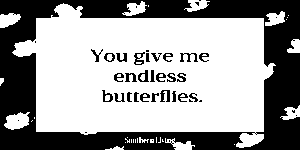

In [99]:
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
thresh = thresholding(gray_)
Image.fromarray(thresh)

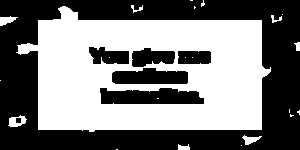

In [100]:
def erode(image):
    kernel = np.ones((5, 5), np.uint8)
    return cv2.erode(image, kernel, iterations=1)
eroded = erode(thresh)
Image.fromarray(eroded)

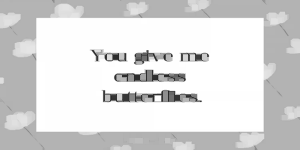

In [101]:
def opening(image):
    kernel = np.ones((5, 5), np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
opened = opening(gray_)
Image.fromarray(opened)

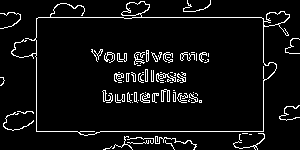

In [102]:
def cany(image):
    return cv2.Canny(image, 100, 200)
canny = cany(gray_)
Image.fromarray(canny)

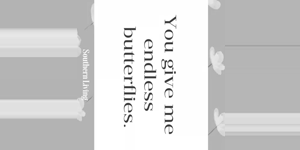

In [103]:
def skew_correction(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated
rotated = skew_correction(gray_)
Image.fromarray(rotated)

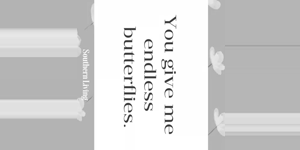

In [104]:
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 0.1)
    # Corrected function name from 'wrapAffine' to 'warpAffine'
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated
deskewed = deskew(gray_)
Image.fromarray(rotated) # You likely want to display 'deskewed' instead of 'rotated'

In [105]:
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)
match = match_template(gray_, gray_)
match

array([[1.]], dtype=float32)

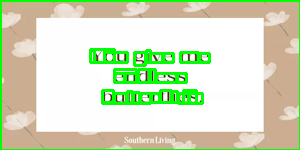

In [106]:
img = cv2.imread('sample.png')
h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img)
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)
Image.fromarray(img)

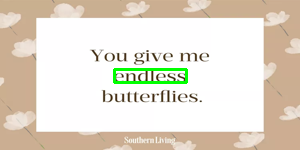

In [108]:
image = cv2.imread('sample.png')
d = pytesseract.image_to_data(image, output_type=Output.DICT)
keys = list(d.keys())
date_pattern = "endless"
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(float(d['conf'][i])) > 60:
      if re.match(date_pattern, d['text'][i]):
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
Image.fromarray(image)